In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd, gzip, math, gdown, scipy.optimize
from sklearn.linear_model import LinearRegression
from sklearn. metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import svm

### Loading Data from JSON (DO NOT RUN)

Note: Do NOT run this section as this section is how we produced "raw_data.csv". The csv can directly be downloaded from Google Drive as we have difficulties uploading large files.

In [8]:
def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)
        
def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        d = eval(l)
        if 'review/overall' not in l:
            continue
        br_id, ABV, style = d['beer/beerId'], d['beer/ABV'], d['beer/style']
        aprs, aroma, palate, taste = float(d['review/appearance'].split('/')[0]), float(d['review/aroma'].split('/')[0]), float(d['review/palate'].split('/')[0]), float(d['review/taste'].split('/')[0])
        rating = float(d['review/overall'].split('/')[0])
        yield br_id, ABV, style, aprs, aroma, palate, taste, rating
        

dataset = []
for l in readJSON("ratebeer.json.gz"):
        dataset.append(l)
        
print(dataset[0])
df = pd.DataFrame(dataset)
df.columns = ["Beer ID", "ABV","Style","Apperance","Aroma","Palate","Taste","Overall"]
df.head()

('63836', '5.4', 'India Pale Ale &#40;IPA&#41;', 4.0, 6.0, 4.0, 7.0, 13.0)


,Beer ID,ABV,Style,Apperance,Aroma,Palate,Taste,Overall
0,63836,5.4,India Pale Ale &#40;IPA&#41;,4.0,6.0,4.0,7.0,13.0
1,71716,5,Bohemian Pilsener,4.0,5.0,3.0,6.0,14.0
2,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
3,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
4,31544,-,Sweet Stout,5.0,8.0,4.0,7.0,16.0


In [11]:
df.shape

(2924162, 8)

In [10]:
# save data
df.to_csv('raw_data.csv', index = False)

### Data Preprocessing and Exploration

In [2]:
url = 'https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ'
output = 'raw_data.csv'

gdown.download(url, output, quiet=False)
df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ
From (redirected): https://drive.google.com/uc?id=1YE64oUNrTFDZcBJ_lK8mXtY0qImjjwyQ&confirm=t&uuid=795a5706-cf26-47e2-9152-19fcd54a13be
To: c:\Users\Tony Han\Documents\GitHub\CSE_151A\CSE151A-Project\raw_data.csv
100%|██████████| 135M/135M [00:03<00:00, 35.3MB/s] 
C:\Users\Tony Han\AppData\Local\Temp\ipykernel_20764\1156208629.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


,Beer ID,ABV,Style,Apperance,Aroma,Palate,Taste,Overall
0,63836,5.4,India Pale Ale &#40;IPA&#41;,4.0,6.0,4.0,7.0,13.0
1,71716,5,Bohemian Pilsener,4.0,5.0,3.0,6.0,14.0
2,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
3,64125,5.4,Klsch,2.0,4.0,2.0,4.0,8.0
4,31544,-,Sweet Stout,5.0,8.0,4.0,7.0,16.0


In [14]:
df_num = df.drop(columns = ["Style", "Beer ID"])
df_num = df_num.apply(pd.to_numeric, errors = 'coerce')

In [15]:
df_num = df_num.dropna()
df_num.shape

(2785525, 6)

In [17]:
df_num.to_csv('cleaned_numeric_data.csv', index = False)

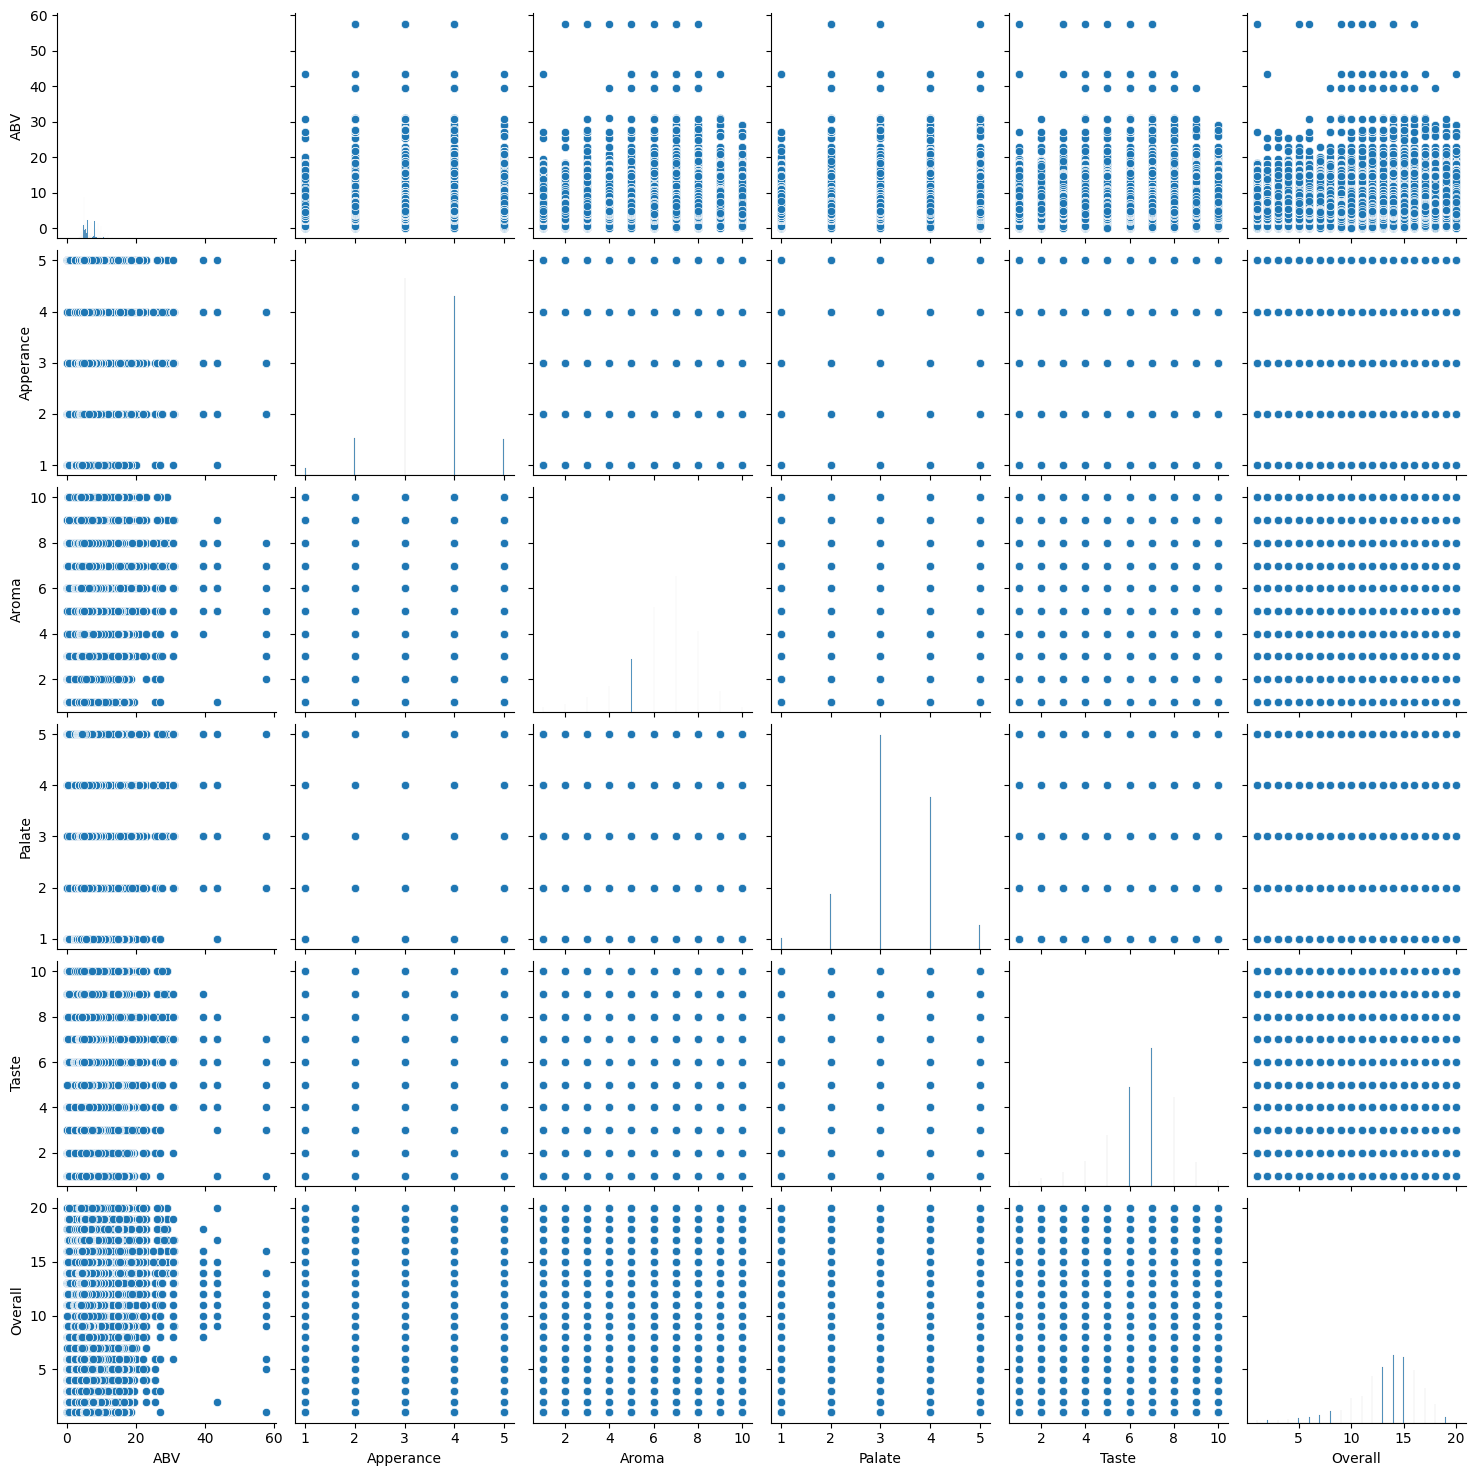

In [18]:
sns.pairplot(df_num)

<Axes: >

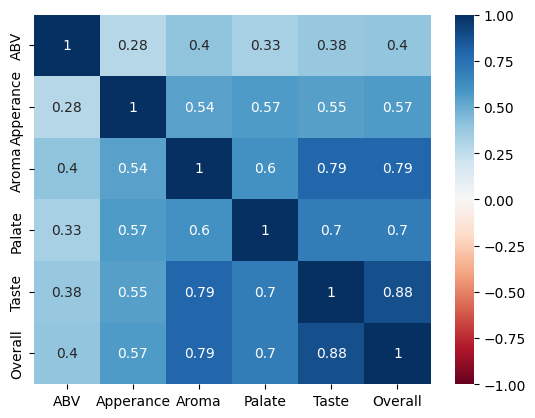

In [19]:
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, center = 0, annot= True, cmap = 'RdBu')